In [13]:
import pandas as pd
file_url = "https://drive.google.com/uc?id=1qHst5w8frzO5GUu328CWeP1pF-noN9iz"

# data frame
df = pd.read_csv(file_url)
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# date time

In [14]:
pd.to_datetime(df['datetime'])

0       2011-01-01 00:00:00
1       2011-01-01 01:00:00
2       2011-01-01 02:00:00
3       2011-01-01 03:00:00
4       2011-01-01 04:00:00
                ...        
10881   2012-12-19 19:00:00
10882   2012-12-19 20:00:00
10883   2012-12-19 21:00:00
10884   2012-12-19 22:00:00
10885   2012-12-19 23:00:00
Name: datetime, Length: 10886, dtype: datetime64[ns]

In [15]:
df_1 = df.copy()

df_1['datetime'] = pd.to_datetime(df_1['datetime'])
df_1.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [16]:
[df_1['datetime'].dt.month == 5]

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 10881    False
 10882    False
 10883    False
 10884    False
 10885    False
 Name: datetime, Length: 10886, dtype: bool]

In [17]:
df_1[df_1['datetime'].dt.day == 17]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
372,2011-01-17 00:00:00,1,1,0,2,8.20,9.850,47,15.0013,1,16,17
373,2011-01-17 01:00:00,1,1,0,2,8.20,9.850,44,12.9980,1,15,16
374,2011-01-17 02:00:00,1,1,0,2,7.38,8.335,43,16.9979,0,8,8
375,2011-01-17 03:00:00,1,1,0,2,7.38,9.090,43,12.9980,0,2,2
376,2011-01-17 04:00:00,1,1,0,2,7.38,9.850,43,8.9981,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10833,2012-12-17 19:00:00,4,0,1,2,17.22,21.210,88,8.9981,7,333,340
10834,2012-12-17 20:00:00,4,0,1,2,17.22,21.210,94,16.9979,8,192,200
10835,2012-12-17 21:00:00,4,0,1,2,17.22,21.210,94,8.9981,6,114,120
10836,2012-12-17 22:00:00,4,0,1,2,17.22,21.210,94,8.9981,5,49,54


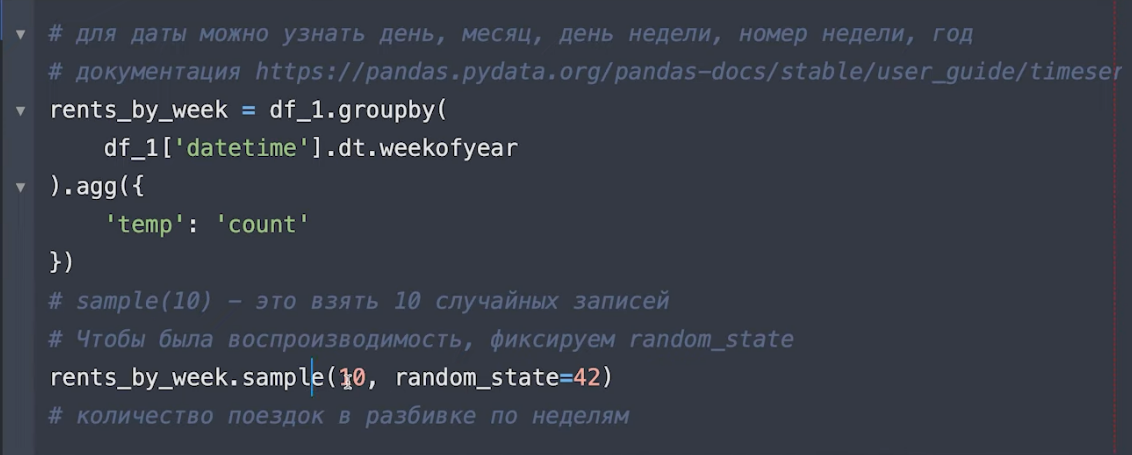

# визуализация

In [18]:

rents_by_week = df_1.groupby(
    df_1['datetime'].dt.weekofyear
).agg({
'temp': 'count'
})

<ipython-input-18-11167c60962e>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_1['datetime'].dt.weekofyear


In [19]:
rents_by_week.sample(10, random_state=42)


,temp
datetime,
46,312
29,144
31,288
51,96
41,336
48,144
6,330
15,334
11,308


<Axes: title={'center': 'Количество поездок понедельно'}, xlabel='Номер недели', ylabel='Число поездок'>

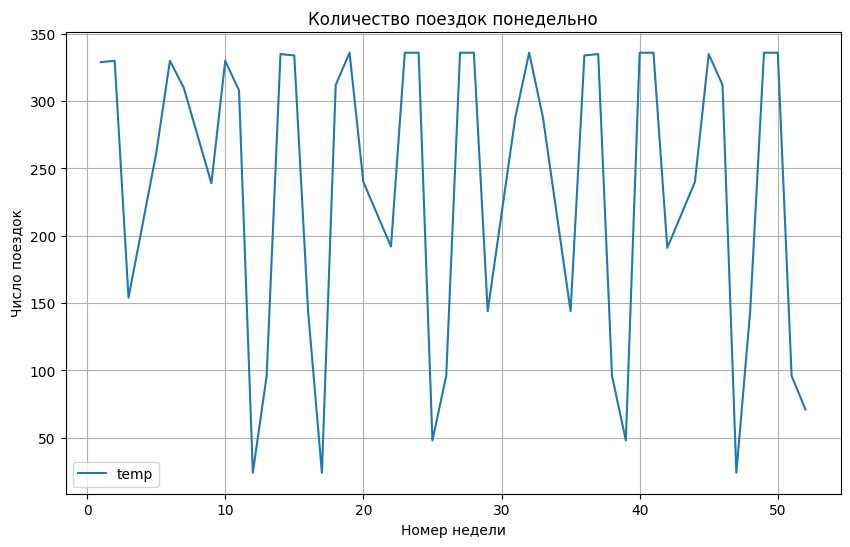

In [22]:
rents_by_week.plot(
    xlabel='Номер недели',
    ylabel='Число поездок',
    title='Количество поездок понедельно',
    grid=True,
    figsize=(10, 6)
)


<Axes: >

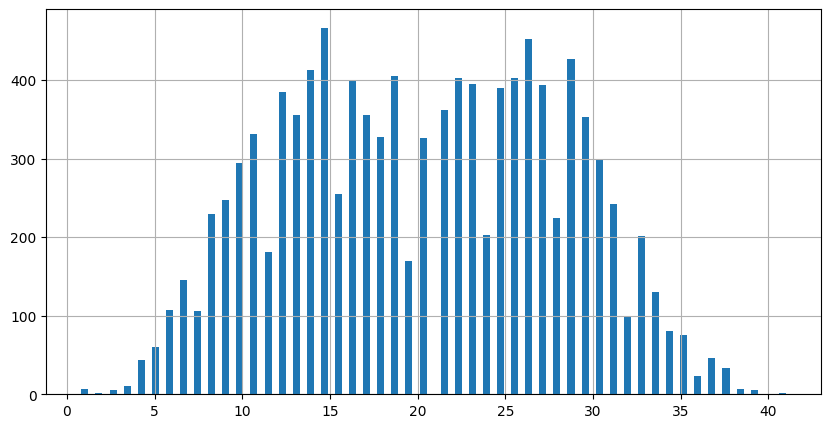

In [23]:
df_1['temp'].hist(bins=100, figsize=(10, 5))


Text(0.5, 1.0, 'Гистограмма числа поездок понедельно')

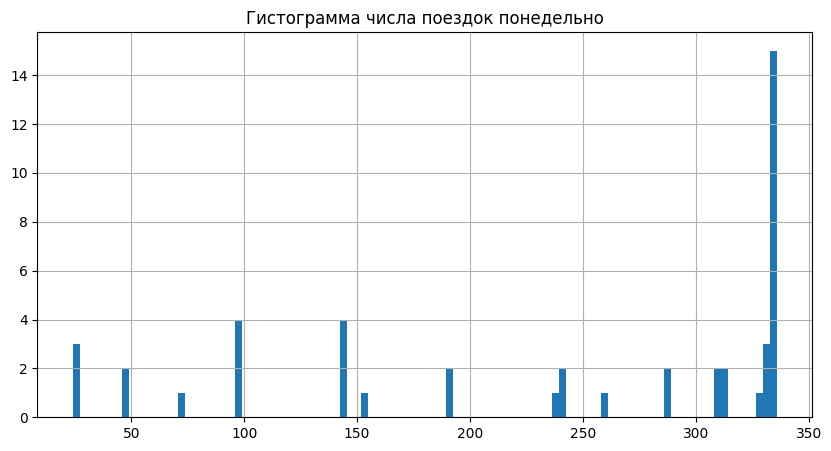

In [25]:
ax = rents_by_week.hist(bins=100, figsize=(10, 5))
# объект графика возвращается функцией .hist - его можно положить в переменную
# затем добавлять все, что хотим. Добавим title
ax[0, 0].set_title('Гистограмма числа поездок понедельно')

Text(0, 0.5, 'Сколько раз было такое количество поездок')

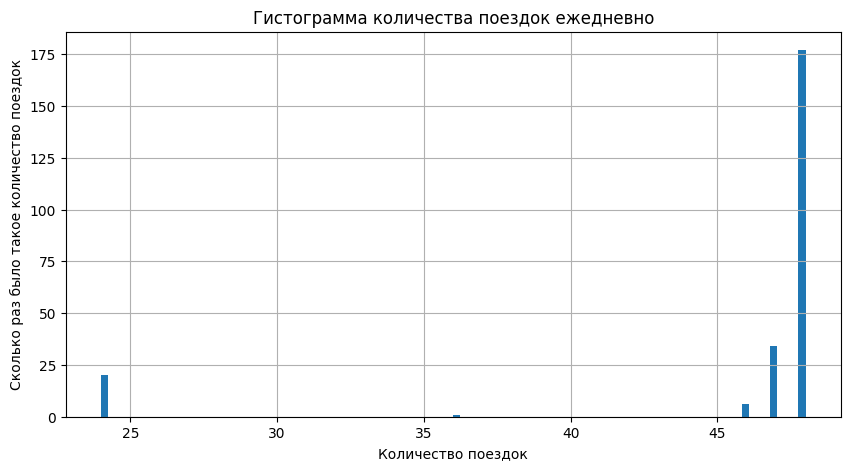

In [27]:
ax = df_1.groupby(
df_1['datetime'].dt.dayofyear # группируем по дням
).agg({
'datetime': 'count' # считаем количество записей в группе
}).hist( # строим гистограмму
bins=100,
figsize=(10, 5)
)
ax = ax[0, 0] # matplotlib возвращает двумерный массив, распакуем его
ax.set_title('Гистограмма количества поездок ежедневно')
ax.set_xlabel('Количество поездок')
ax.set_ylabel('Сколько раз было такое количество поездок')